# Assignment: Advanced Regression

## Problem Statement

### A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

### The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

### The company wants to know:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

### The solution is divided into the following sections:

Data understanding and exploration

Data cleaning

Data preparation

Model building and evaluation

### 1. Data Understanding and Exploration
Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading the dataset
house = pd.read_csv("C:/Users/hp/Desktop/train.csv", na_values="NAN")

In [4]:
# Let's take a look
# Pandas head() method is used to return top n (5 by default) rows of a data frame or series.

house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# summary of the dataset

#The info() method is useful to get a quick description of the data, 
#in particular the total number of rows and each attributes types and number of non-null values.

print(house.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Summary of the dataset : 1460 rows, 81 columns

In [6]:
#Shape of the Train including no.of rows and the Columns.
house.shape

(1460, 81)

In [7]:
 #describe gives a summary of the statistics (only for numerical columns)
    
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
def display_all(df):   
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(house.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


In [10]:
display_all(house.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,1460,NaN,NaN,NaN,730.5,421.61,1,365.75,730.5,1095.25,1460
MSSubClass,1460,NaN,NaN,NaN,56.8973,42.3006,20,20,50,70,190
MSZoning,1460,5,RL,1151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotFrontage,1201,NaN,NaN,NaN,70.05,24.2848,21,59,69,80,313
LotArea,1460,NaN,NaN,NaN,10516.8,9981.26,1300,7553.5,9478.5,11601.5,215245
Street,1460,2,Pave,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alley,91,2,Grvl,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotShape,1460,4,Reg,925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LandContour,1460,4,Lvl,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Utilities,1460,2,AllPub,1459,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
type(house)

pandas.core.frame.DataFrame

In [12]:
house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
numerical_feats = house.dtypes[house.dtypes != "object"].index  
print("Number of Numerical features: ", len(numerical_feats))

categorical_feats = house.dtypes[house.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))


Number of Numerical features:  38
Number of Categorical features:  43


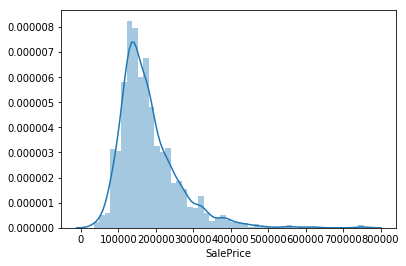

In [14]:
sns.distplot(house['SalePrice'])

In [15]:
print("Skewness: %f" % house['SalePrice'].skew())
print("Kurtosis: %f" % house['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


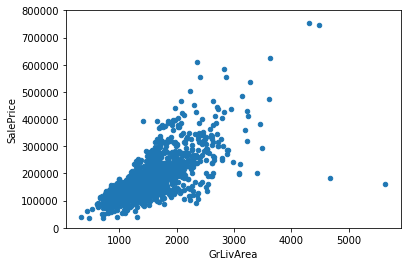

In [16]:
var = 'GrLivArea'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

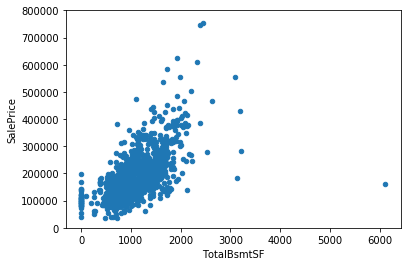

In [17]:
var = 'TotalBsmtSF'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

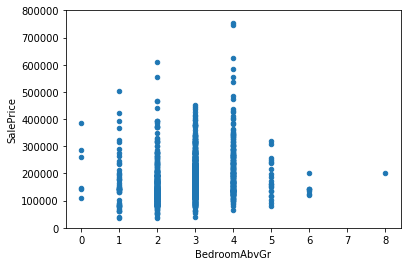

In [18]:
var = 'BedroomAbvGr'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### We will see all the categorical and numerical plot ahead. 

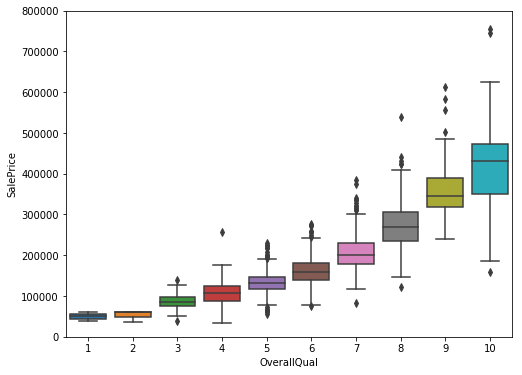

In [19]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

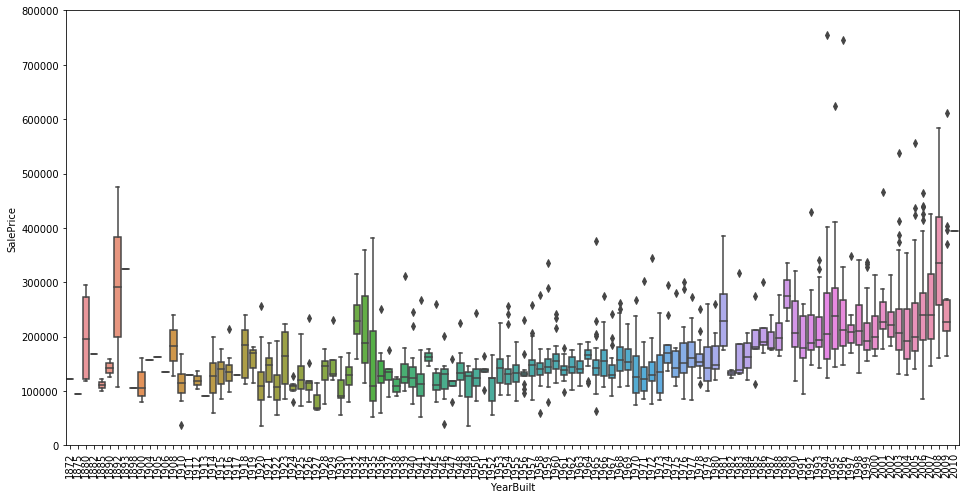

In [20]:
var = 'YearBuilt'
data = pd.concat([house['SalePrice'], house[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

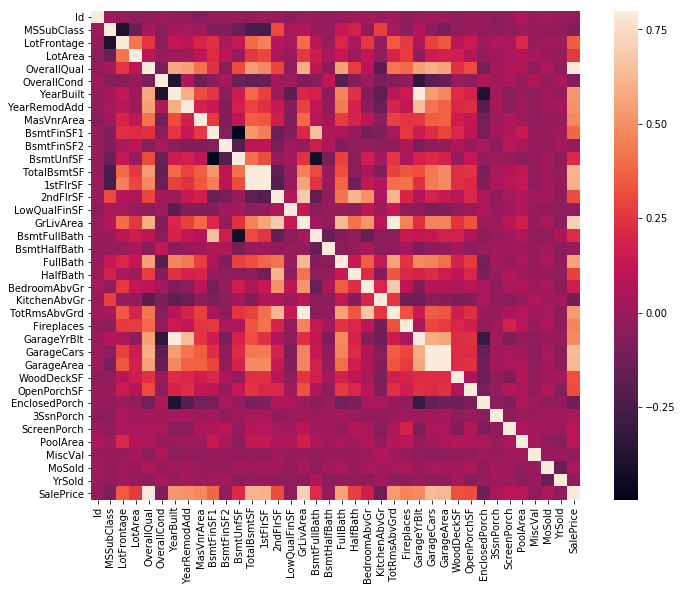

In [21]:
#correlation matrix
corrmat = house.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

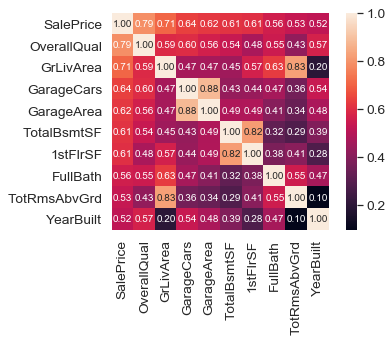

In [22]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:

### 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'. 
### 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area.
### 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
### 'TotalBsmtSF' and '1stFloor' also seem to be twin brothers. We can keep 'TotalBsmtSF' .
### 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again. 

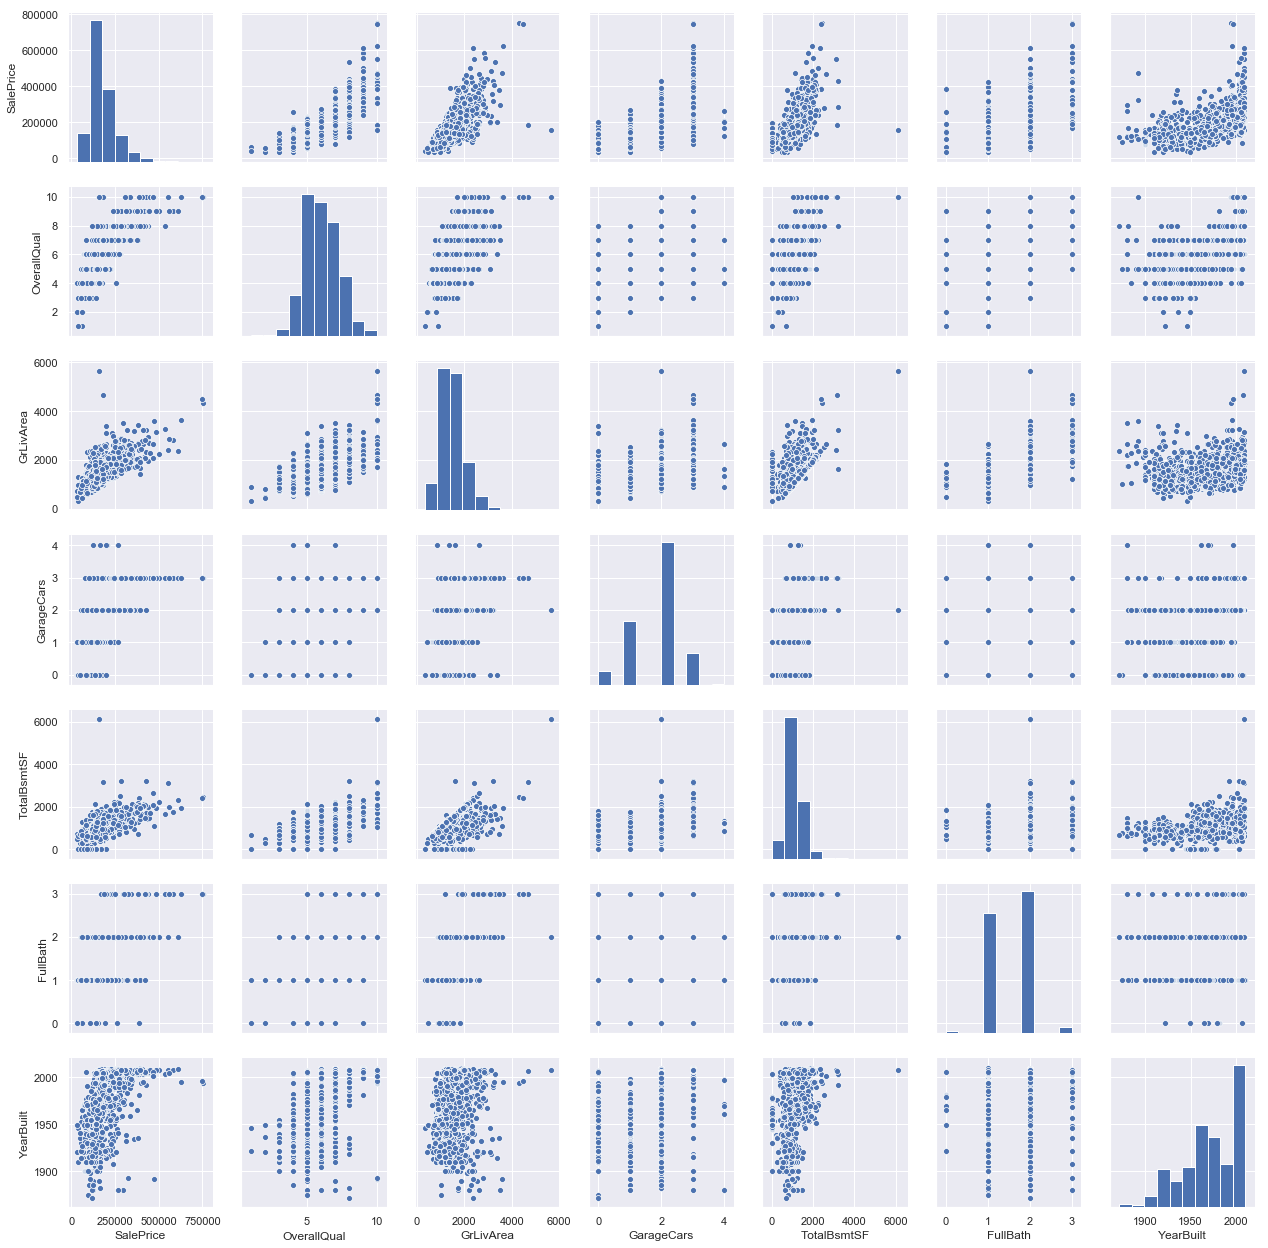

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(house[cols], size = 2.5)
plt.show()

## Missing data

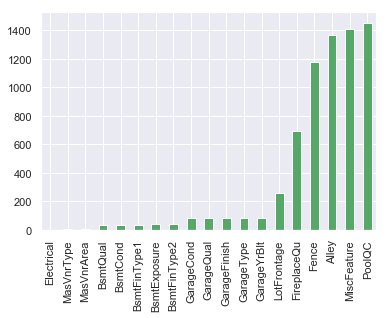

In [24]:
# we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

missing = house.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='g')

## 19 Features have missing values

In [25]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [26]:
#We can find these features on the data file provided

null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [27]:
for i in null_has_meaning:
    house[i].fillna("None", inplace=True)
    house[i].fillna("None", inplace=True)

## Imputing "Real" NaN Values

### There are missing values for both numerical and categorical data.

### For numerical imputing, we can fill the missing values with a measure like median, mean, or mode.
### For categorical imputing, I am filling the missing values with the most common term that appeared from the entire column. 
### There are places where NaN Means Something
### This means that if a value is NaN, the house might not have that certain attribute, which will affect the price of the house.
### Therefore, it is better to not drop, but fill in the null cell with a value called "None" which serves as its own category.

In [28]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

In [29]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000


In [30]:
# LotFrontage has too many Null values and it is a numerical value so it may be better to just drop it.
house.drop("LotFrontage", axis=1, inplace=True)

In [31]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000


### GarageYrBlt, MasVnrArea, and MasVnrType all have a fairly decent amount of missing values.
### MasVnrType is categorical so we can replace the missing values with "None", as we did before. We can fill the others with median.



In [32]:
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["MasVnrType"].fillna("None", inplace=True)

In [33]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [34]:
# Only one row has a null entry.
house.dropna(inplace=True)

In [35]:
#missing data
total = house.isnull().sum().sort_values(ascending=False)
percent = (house.isnull().sum()/house.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [36]:
print(house.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-

## determine the data type of all features remaining

In [37]:
types_train = house.dtypes #type of each feature in data: int, float, object
num_train = types_train[(types_train == 'int64') | (types_train == float)] #numerical values are either type int or float
cat_train = types_train[types_train == object] #categorical values are type object

In [38]:
pd.DataFrame(types_train).reset_index().set_index(0).reset_index()[0].value_counts()

object     43
int64      35
float64     2
Name: 0, dtype: int64

In [39]:
# convert num_train to a list 
numerical_values_train = list(num_train.index)

In [40]:
print(numerical_values_train)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [41]:
categorical_values_train = list(cat_train.index)
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Relationship with numerical variables

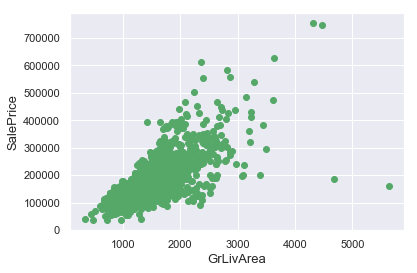

In [42]:
fig, ax = plt.subplots()
ax.scatter(x = house['GrLivArea'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### It seems that 'SalePrice' and 'GrLivArea' are really old friends, with a linear relationship.

### And what about others?

In [43]:
house['GrLivArea'].describe()

count    1459.000000
mean     1515.546950
std       525.650927
min       334.000000
25%      1129.000000
50%      1464.000000
75%      1777.500000
max      5642.000000
Name: GrLivArea, dtype: float64

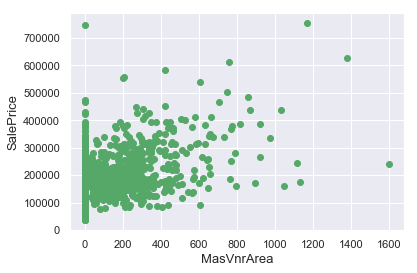

In [44]:
fig, ax = plt.subplots()
ax.scatter(x = house['MasVnrArea'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('MasVnrArea', fontsize=13)
plt.show()

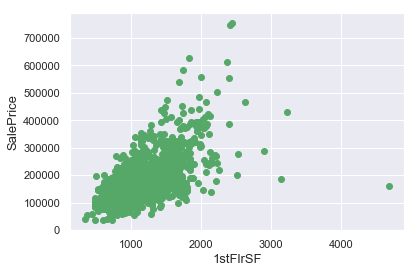

In [45]:
fig, ax = plt.subplots()
ax.scatter(x = house['1stFlrSF'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('1stFlrSF', fontsize=13)
plt.show()


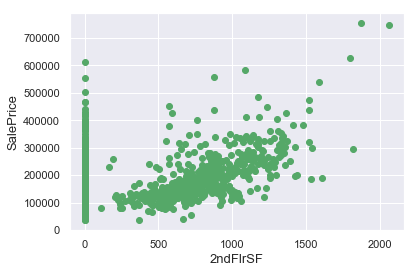

In [46]:
fig, ax = plt.subplots()
ax.scatter(x = house['2ndFlrSF'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('2ndFlrSF', fontsize=13)
plt.show()

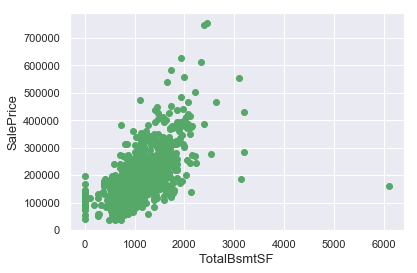

In [47]:
fig, ax = plt.subplots()
ax.scatter(x = house['TotalBsmtSF'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

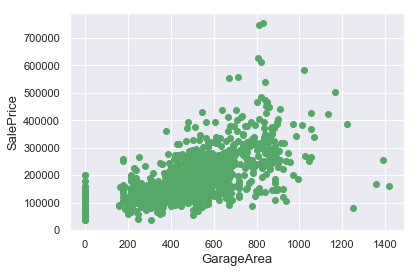

In [48]:
fig, ax = plt.subplots()
ax.scatter(x = house['GarageArea'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageArea', fontsize=13)
plt.show()

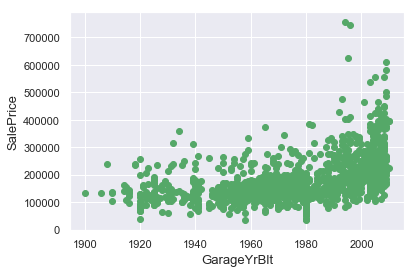

In [49]:
fig, ax = plt.subplots()
ax.scatter(x = house['GarageYrBlt'], y = house['SalePrice'], color='g')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GarageYrBlt', fontsize=13)
plt.show()

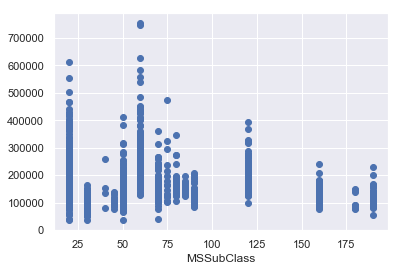

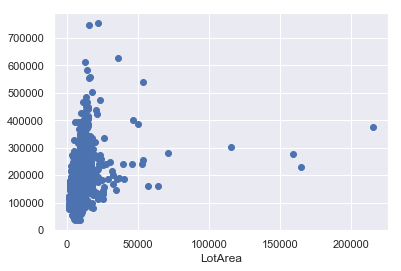

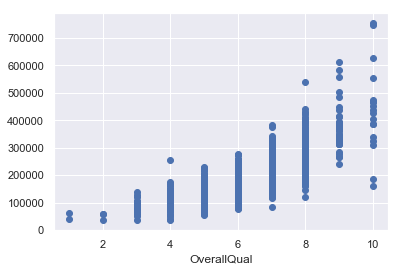

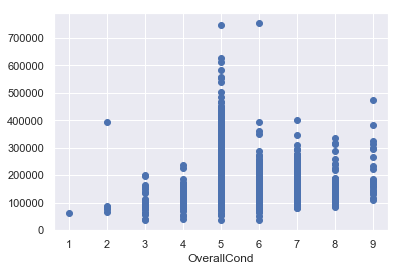

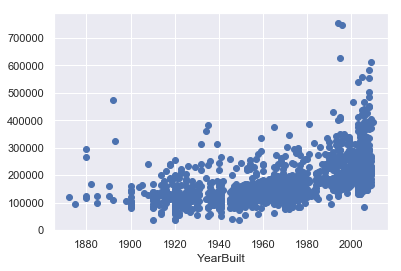

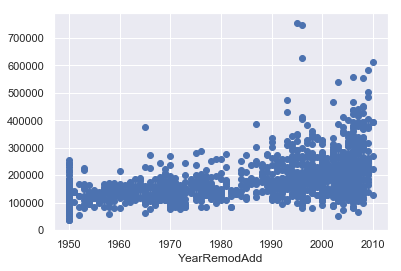

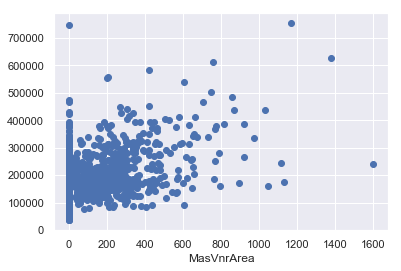

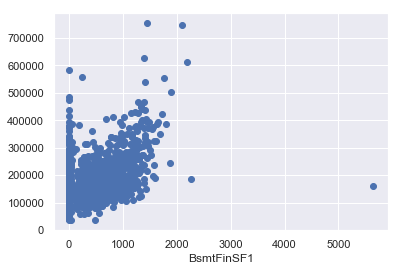

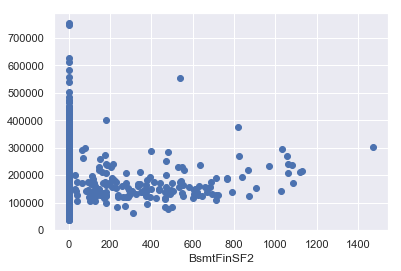

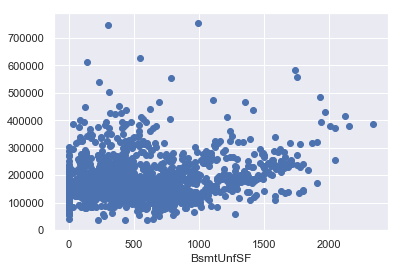

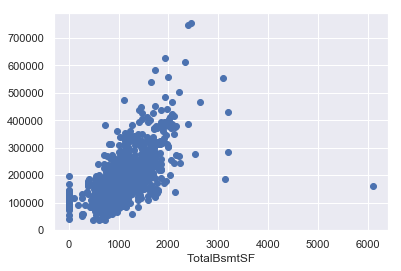

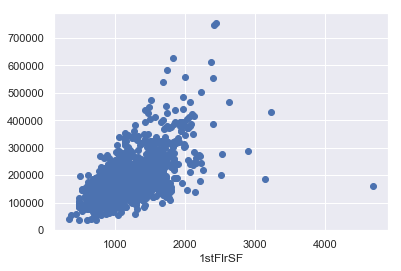

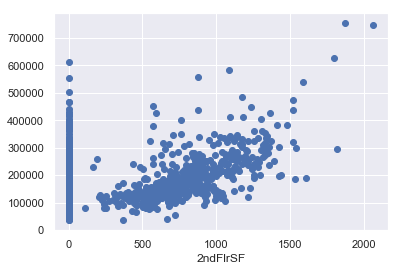

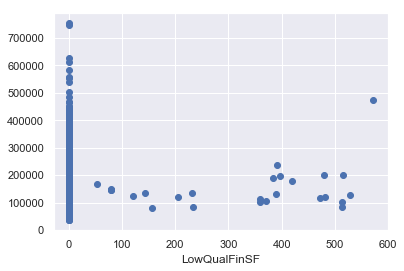

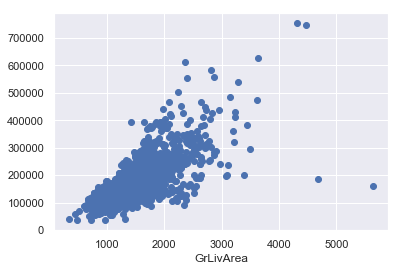

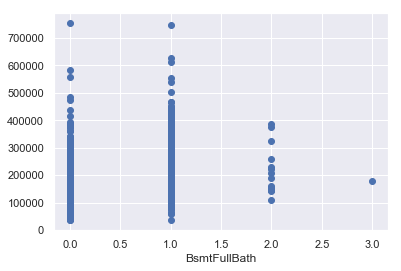

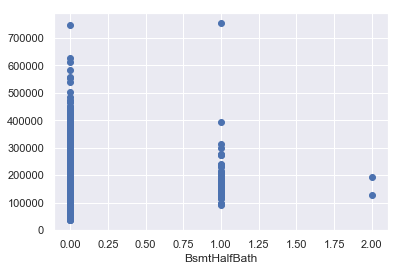

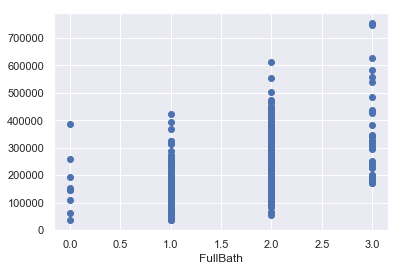

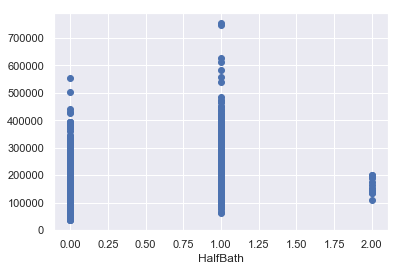

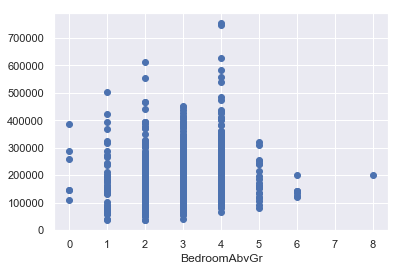

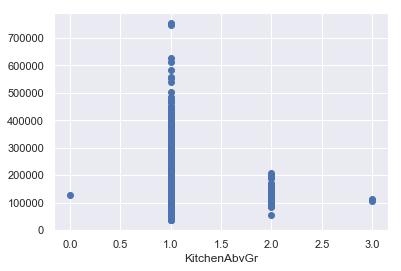

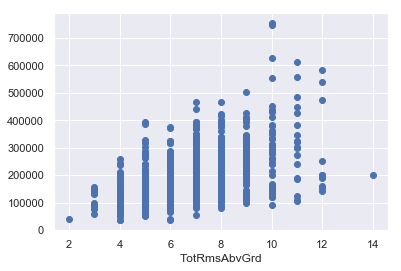

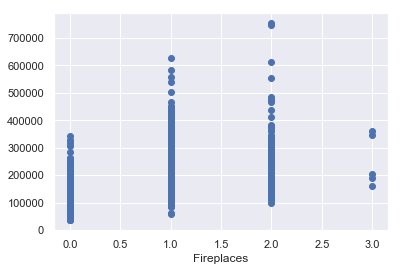

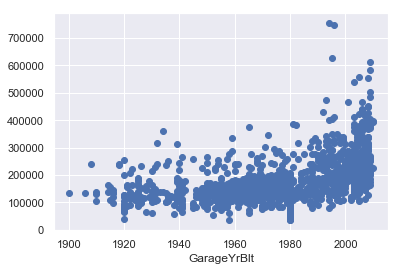

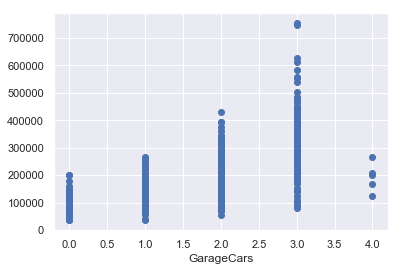

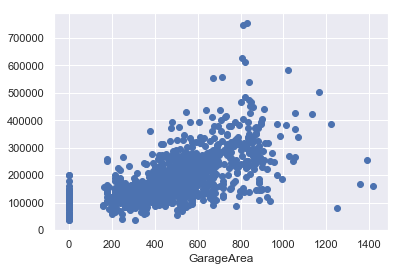

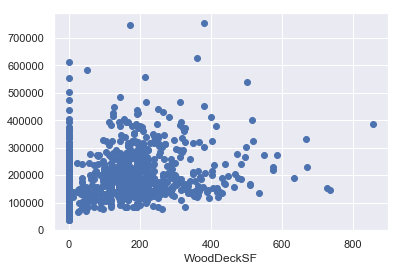

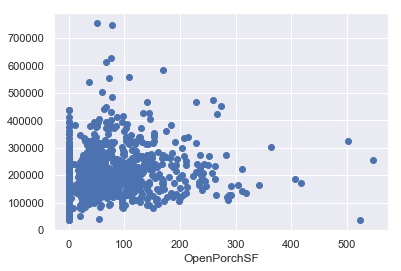

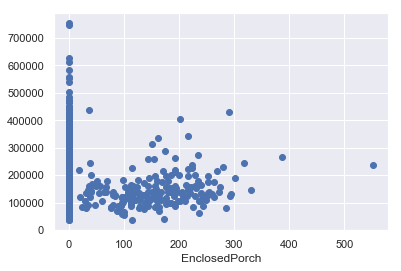

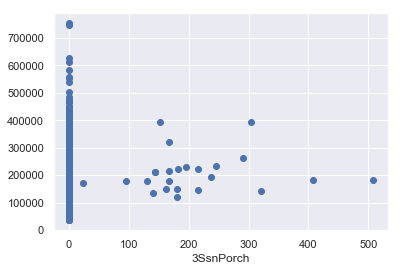

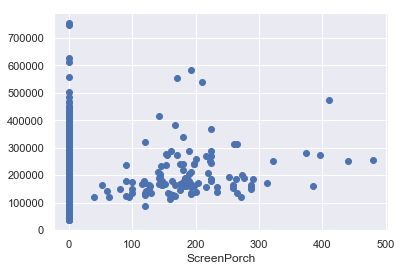

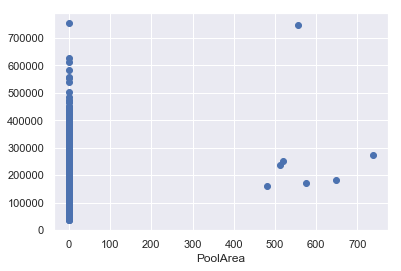

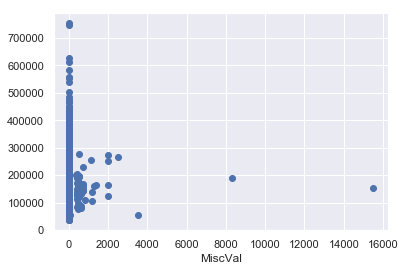

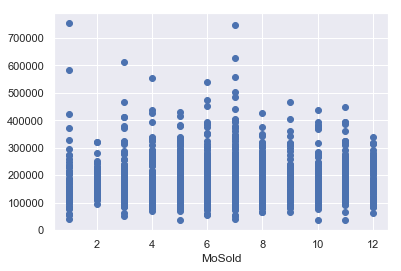

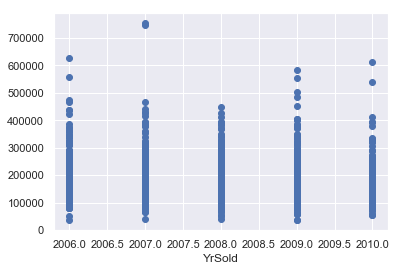

In [50]:
for X in ['MSSubClass', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']:
    Z=house[X]
    Y = house["SalePrice"]
    plt.xlabel(X)
    plt.scatter(Z,Y)
    plt.show()

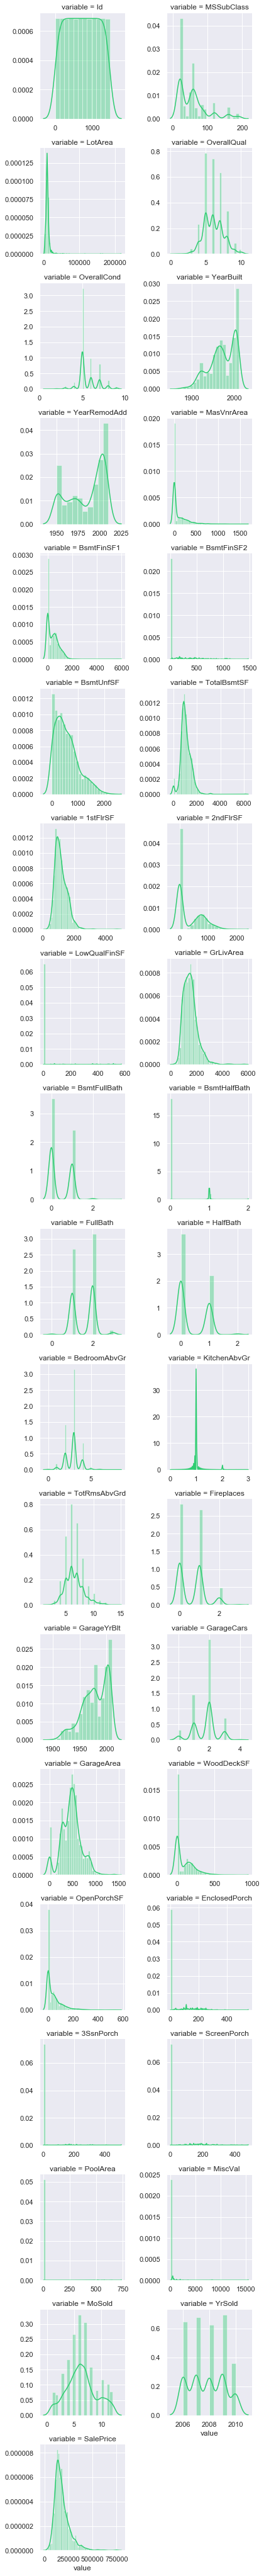

In [51]:
f = pd.melt(house, value_vars=numerical_values_train)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value",color="#2ecc71")

## Data Preparation

### we have dealt with all the missing values, Now we need to create feature vectors in order to get the data ready to be fed into our model as training data. This requires us to convert the categorical values into representative numbers.

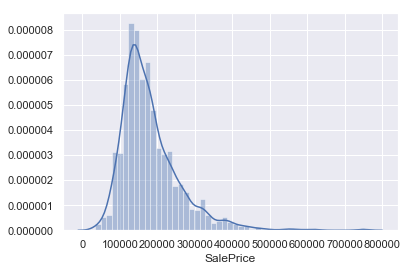

In [52]:
sns.distplot(house["SalePrice"])

## Log Transformation

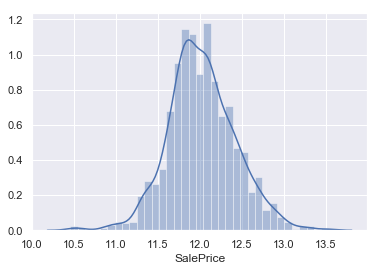

In [53]:
sns.distplot(np.log(house["SalePrice"]))

In [54]:
for col in numerical_values_train:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(house[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(house[col].kurt())  
         )

Id              Skewness: 00.00     Kurtosis: -01.20
MSSubClass      Skewness: 01.41     Kurtosis: 001.58
LotArea         Skewness: 12.20     Kurtosis: 203.10
OverallQual     Skewness: 00.22     Kurtosis: 000.10
OverallCond     Skewness: 00.69     Kurtosis: 001.10
YearBuilt       Skewness: -0.61     Kurtosis: -00.44
YearRemodAdd    Skewness: -0.50     Kurtosis: -01.27
MasVnrArea      Skewness: 02.68     Kurtosis: 010.13
BsmtFinSF1      Skewness: 01.69     Kurtosis: 011.12
BsmtFinSF2      Skewness: 04.25     Kurtosis: 020.10
BsmtUnfSF       Skewness: 00.92     Kurtosis: 000.47
TotalBsmtSF     Skewness: 01.53     Kurtosis: 013.28
1stFlrSF        Skewness: 01.38     Kurtosis: 005.75
2ndFlrSF        Skewness: 00.81     Kurtosis: -00.55
LowQualFinSF    Skewness: 09.01     Kurtosis: 083.17
GrLivArea       Skewness: 01.37     Kurtosis: 004.89
BsmtFullBath    Skewness: 00.59     Kurtosis: -00.84
BsmtHalfBath    Skewness: 04.10     Kurtosis: 016.38
FullBath        Skewness: 00.04     Kurtosis: 

### Skewness is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.

### kurtosis is actually the measure of outliers present in the distribution.

## Relationship with categorical features

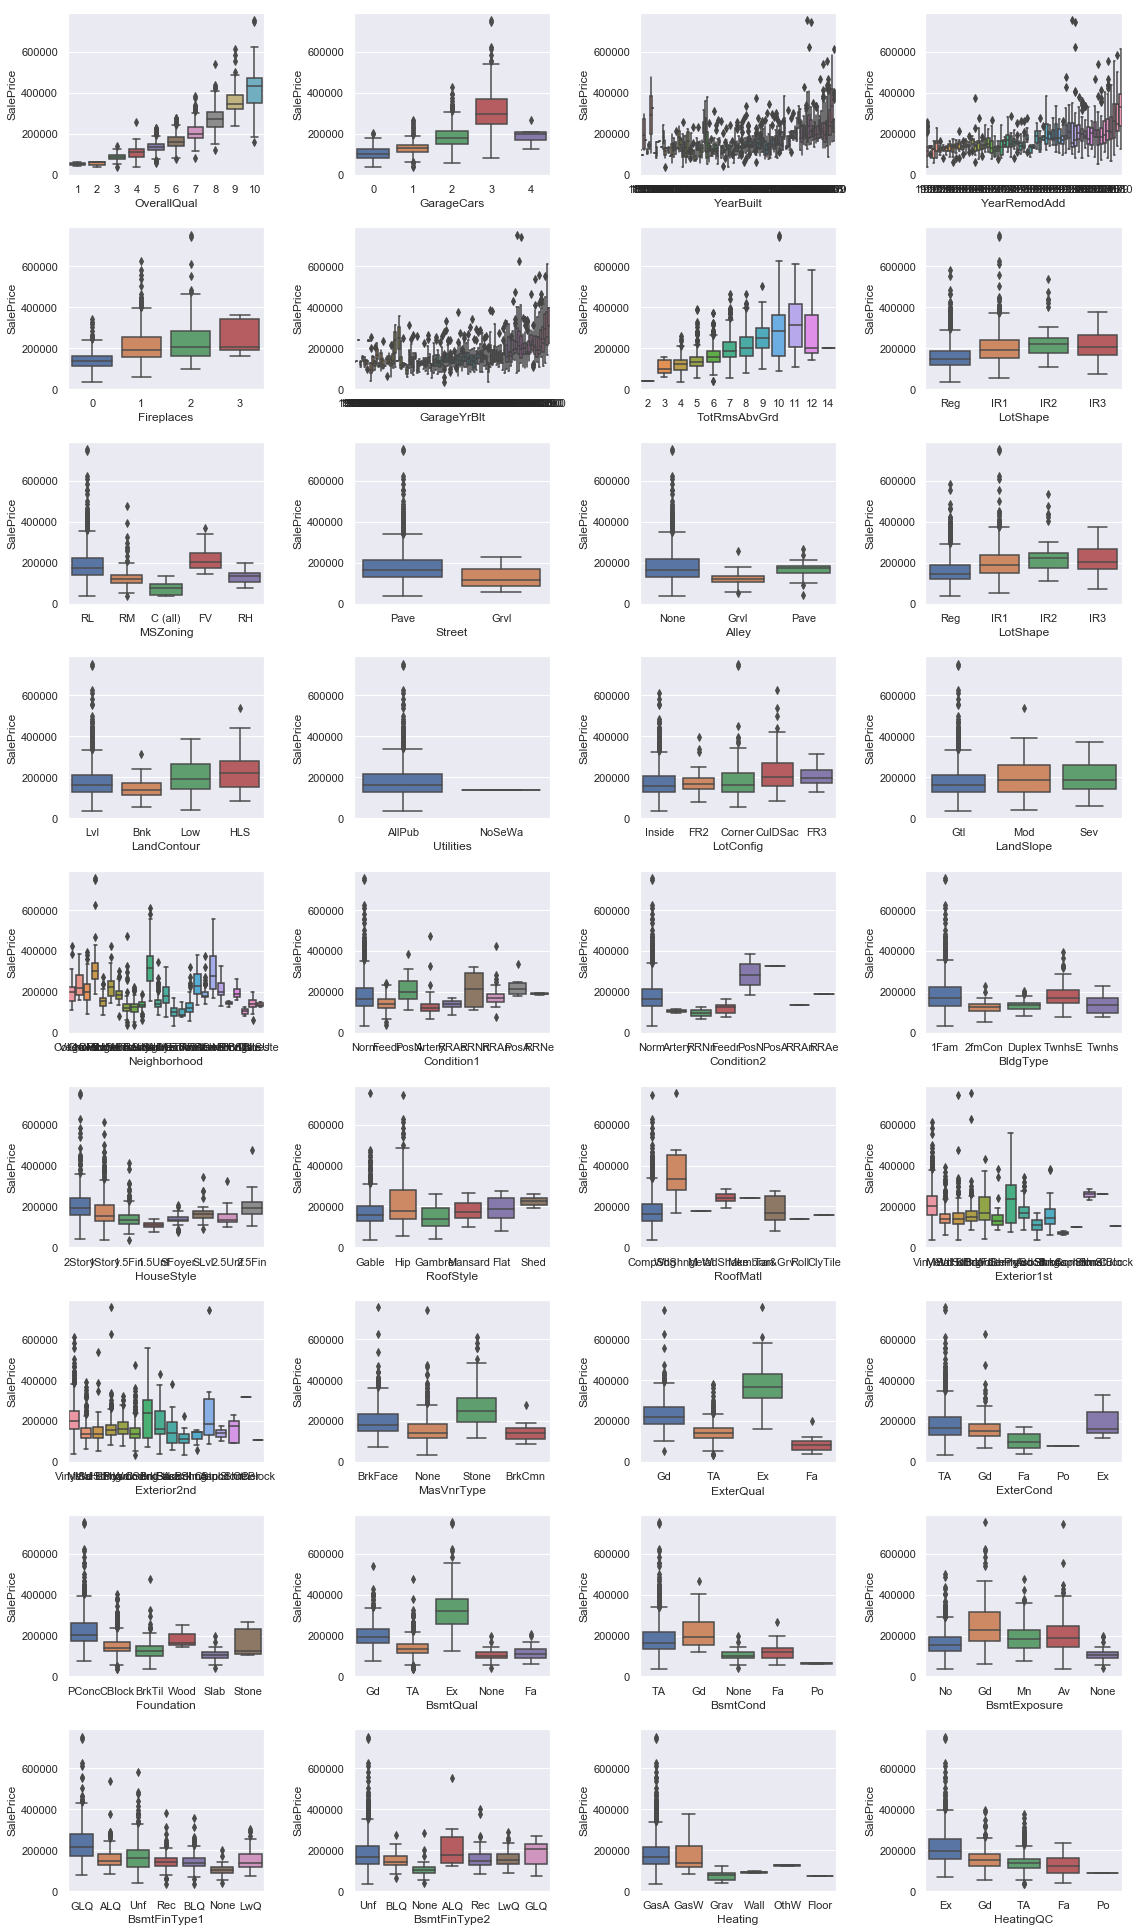

In [55]:
li_cat_feats = ['OverallQual','GarageCars', 'YearBuilt', 'YearRemodAdd', 'Fireplaces', 'GarageYrBlt', 'TotRmsAbvGrd','LotShape','MSZoning',
                'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition']
target = 'SalePrice'
nr_rows = 9
nr_cols = 4

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*4,nr_rows*3))

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(li_cat_feats):
            sns.boxplot(x=li_cat_feats[i], y=target, data=house, ax = axs[r][c])
plt.tight_layout()    
plt.show()


### Correlation matrix (heatmap style)

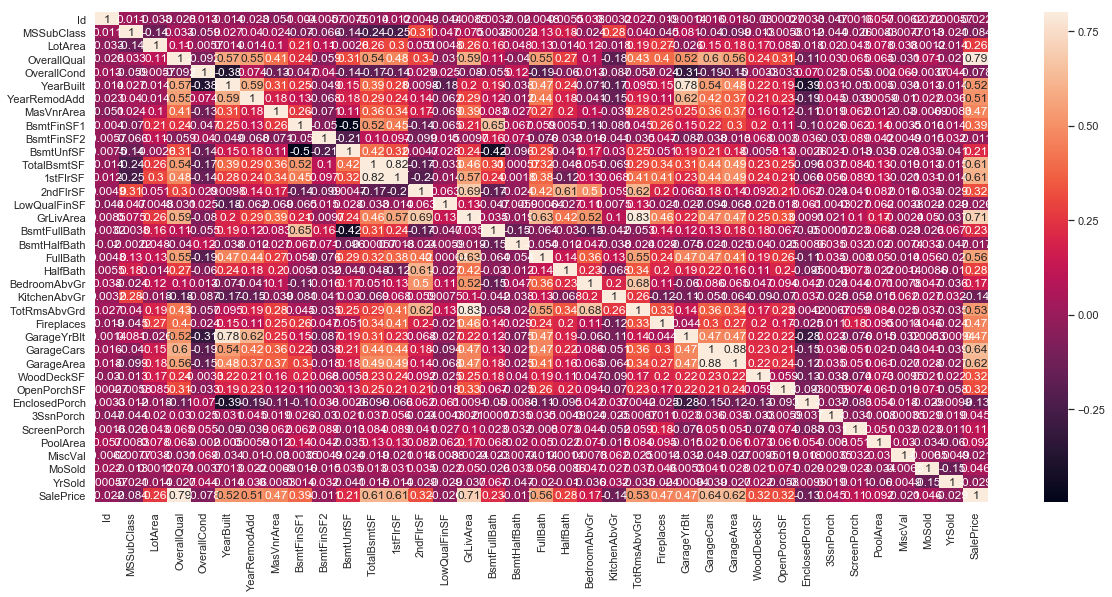

In [56]:
corrmat = house.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True)

### zoomed heatmap style

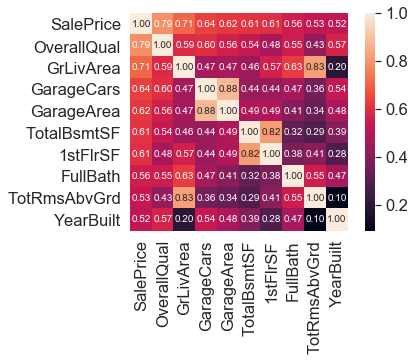

In [57]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(house[cols].values.T)
sns.set(font_scale=1.50)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


### It appears that the target, SalePrice, is very skewed and a transformation like a logarithm would make it more normally distributed. .


In [58]:
house["TransformedPrice"] = np.log(house["SalePrice"])

In [59]:
print(categorical_values_train)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [60]:
for i in categorical_values_train:
    feature_set = set(house[i])
    for j in feature_set:
        feature_list = list(feature_set)
        house.loc[house[i] == j, i] = feature_list.index(j)

In [61]:
house.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,0,8450,0,2,3,2,0,2,...,3,2,3,0,2,2008,1,3,208500,12.247694
1,2,20,0,9600,0,2,3,2,0,1,...,3,2,3,0,5,2007,1,3,181500,12.109011
2,3,60,0,11250,0,2,1,2,0,2,...,3,2,3,0,9,2008,1,3,223500,12.317167
3,4,70,0,9550,0,2,1,2,0,3,...,3,2,3,0,2,2006,1,2,140000,11.849398
4,5,60,0,14260,0,2,1,2,0,1,...,3,2,3,0,12,2008,1,3,250000,12.429216


###  All the categorical strings have been changed into a representative number. 
### Let's build the model now.

## Model Building

In [62]:
X = house.drop(["Id", "SalePrice", "TransformedPrice"], axis=1)
y = house["TransformedPrice"]

In [63]:
# split into train and test
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Feature Scaling

In [64]:
X.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,8450,0,2,3,2,0,2,2,...,0,0,3,2,3,0,2,2008,1,3
1,20,0,9600,0,2,3,2,0,1,2,...,0,0,3,2,3,0,5,2007,1,3
2,60,0,11250,0,2,1,2,0,2,2,...,0,0,3,2,3,0,9,2008,1,3
3,70,0,9550,0,2,1,2,0,3,2,...,0,0,3,2,3,0,2,2006,1,2
4,60,0,14260,0,2,1,2,0,1,2,...,0,0,3,2,3,0,12,2008,1,3


In [65]:
scs = StandardScaler()

In [67]:
X_train_scs = scs.fit_transform(X_train)
X_test_scs = scs.transform(X_test)

In [68]:
X_train_scs=pd.DataFrame(X_train_scs)
X_test_scs=pd.DataFrame(X_test_scs)

In [69]:
X_train_scs.columns=X_train.columns
X_test_scs.columns=X_test.columns

In [70]:
X_train_scs.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.787494,-0.500380,-0.049244,-0.076885,0.252568,0.744339,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,0.633710,0.890540,0.584479,0.055213
1,3.177599,2.217109,0.067048,-0.076885,0.252568,0.744339,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,-0.830960,1.638888,-0.355290,0.055213
2,-0.168548,-0.500380,-0.213872,-0.076885,-4.567466,0.744339,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,1.573369,-0.14298,-0.077724,-0.830960,0.142193,-0.355290,0.055213
3,0.070462,-0.500380,-0.172811,-0.076885,0.252568,0.744339,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,-0.098625,0.890540,-0.355290,0.055213
4,-0.885580,-0.500380,-0.044841,-0.076885,0.252568,-1.349242,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,-1.197128,1.638888,-0.355290,0.055213


In [71]:
X_test_scs.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.070462,-0.500380,0.149840,-0.076885,0.252568,-1.349242,-4.666288,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,0.267543,-0.606154,-0.35529,0.055213
1,0.070462,2.217109,-0.695025,-0.076885,-4.567466,0.744339,2.559617,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,0.999878,0.890540,-0.35529,0.055213
2,-0.168548,2.217109,-0.683348,-0.076885,-4.567466,0.744339,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-3.872087,-0.14298,-0.077724,-0.830960,0.890540,-0.35529,0.055213
3,0.070462,-0.500380,0.166207,-0.076885,0.252568,0.744339,0.150982,-0.031311,1.380069,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,-0.464793,1.638888,-0.35529,0.055213
4,0.070462,-0.500380,-0.168408,-0.076885,0.252568,-1.349242,0.150982,-0.031311,-0.044653,0.225541,...,-0.273,-0.054189,0.047233,-0.241783,-0.14298,-0.077724,-0.464793,1.638888,-0.35529,0.055213


In [81]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [82]:
# Importing the relevant libraries
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model

## Ridge Regression

In [83]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_scs, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [84]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004000,0.001075,0.000588,0.000482,0.0001,{'alpha': 0.0001},-0.087663,-0.097885,-0.101803,-0.088763,...,-0.094623,0.005493,25,-0.084717,-0.082069,-0.075570,-0.085264,-0.082355,-0.081995,0.003450
1,0.003593,0.000469,0.000589,0.000482,0.001,{'alpha': 0.001},-0.087663,-0.097885,-0.101803,-0.088656,...,-0.094602,0.005516,21,-0.084717,-0.082069,-0.075570,-0.085265,-0.082355,-0.081995,0.003450
2,0.003985,0.000616,0.000494,0.000437,0.01,{'alpha': 0.01},-0.087663,-0.097884,-0.101803,-0.087642,...,-0.094398,0.005744,14,-0.084717,-0.082069,-0.075570,-0.085273,-0.082355,-0.081997,0.003451
3,0.004724,0.001371,0.000545,0.000446,0.05,{'alpha': 0.05},-0.087662,-0.097882,-0.101803,-0.084046,...,-0.093676,0.006689,5,-0.084719,-0.082070,-0.075571,-0.085300,-0.082355,-0.082003,0.003457
4,0.004490,0.000897,0.000471,0.000774,0.1,{'alpha': 0.1},-0.087661,-0.097879,-0.101803,-0.080937,...,-0.093050,0.007631,2,-0.084721,-0.082072,-0.075572,-0.085325,-0.082356,-0.082009,0.003462


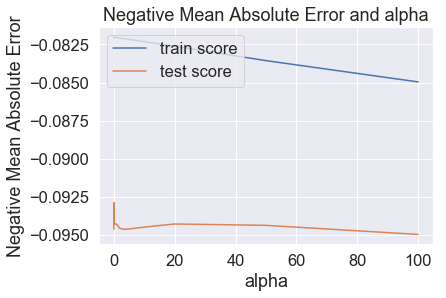

In [85]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [86]:
alpha = 0.1
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_scs, y_train)
ridge.coef_

array([-2.60813947e-02, -1.55693820e-02,  2.48469101e-02, -1.65064691e-02,
        3.12910862e-03, -3.01056766e-03,  3.37818289e-03, -3.73754671e-03,
       -5.29871541e-03, -6.95367465e-03,  5.67284496e-03,  8.39327409e-03,
       -2.13997047e-02,  1.91054489e-02,  7.48685347e-03,  9.02517637e-02,
        5.71651848e-02,  4.87971149e-02,  1.88874805e-02, -3.21949483e-04,
       -1.82243939e-03, -5.08531703e-03,  2.48550575e-03, -1.12919632e-03,
        3.19066637e-03,  6.77497242e-03,  1.00087777e-02, -2.30691047e-02,
        8.01733759e-03, -2.08140720e-03, -1.11915546e-02,  3.56274361e-03,
        3.69338464e-02, -4.92532837e-03,  4.59426232e-03,  6.46622753e-03,
        4.54064596e-02,  1.54394935e-04,  1.41789835e-02, -1.40426974e-02,
       -2.14517123e-03,  3.14057935e-02,  4.49305464e-02,  9.16017640e-04,
        6.06983937e-02,  1.85698059e-02, -2.15618305e-03,  1.86039007e-02,
        1.44373722e-02, -1.99941537e-03, -1.89210249e-02,  6.60127708e-03,
        1.58074568e-02,  

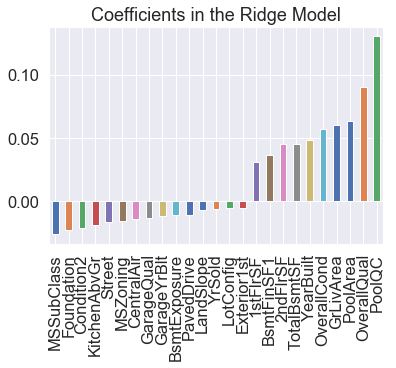

In [87]:
# Plot important coefficients

coefs = pd.Series(ridge.coef_, index = X_train_scs.columns)
imp_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Ridge Model")
plt.show()

## Lasso Regression

In [88]:
folds_cv=5
lamda=np.linspace(.0001,.005,11)
lasso = Lasso()
score_calc='neg_mean_absolute_error'
parameters = {'alpha':lamda}
grid_lasso = GridSearchCV(lasso, parameters, cv=folds_cv, verbose=1, scoring = score_calc,return_train_score=True)
grid_lasso.fit(X_train_scs, y_train)



Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([0.0001 , 0.00059, 0.00108, 0.00157, 0.00206, 0.00255, 0.00304,
       0.00353, 0.00402, 0.00451, 0.005  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [89]:
cv_results_lasso = pd.DataFrame(grid_lasso.cv_results_)
cv_results_lasso.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.055841,0.006035,0.000398,0.000488,0.0001,{'alpha': 0.0001},-0.087523,-0.097714,-0.101764,-0.090615,...,-0.094660,0.005066,11,-0.084699,-0.082026,-0.075562,-0.085382,-0.082323,-0.081999,0.003472
1,0.018181,0.003028,0.000402,0.000493,0.00059,{'alpha': 0.00059},-0.087165,-0.096950,-0.101605,-0.091292,...,-0.093279,0.005275,9,-0.084755,-0.081970,-0.075659,-0.085219,-0.082341,-0.081989,0.003414
2,0.011196,0.001158,0.000205,0.000411,0.00108,{'alpha': 0.00108},-0.086810,-0.096344,-0.101479,-0.091304,...,-0.092876,0.005380,6,-0.084919,-0.082177,-0.075960,-0.085211,-0.082457,-0.082145,0.003330
3,0.007777,0.001158,0.000613,0.000501,0.00157,{'alpha': 0.00157},-0.086468,-0.095736,-0.101481,-0.091311,...,-0.092634,0.005429,3,-0.085142,-0.082502,-0.076369,-0.085260,-0.082775,-0.082410,0.003232
4,0.007159,0.000778,0.000386,0.000473,0.00206,{'alpha': 0.0020599999999999998},-0.086215,-0.095555,-0.101644,-0.091223,...,-0.092508,0.005567,1,-0.085473,-0.082946,-0.076911,-0.085365,-0.083126,-0.082764,0.003115
5,0.008004,0.001277,0.000215,0.000431,0.00255,{'alpha': 0.0025499999999999997},-0.086137,-0.095615,-0.101682,-0.091522,...,-0.092527,0.005629,2,-0.085949,-0.083387,-0.077318,-0.085564,-0.083554,-0.083154,0.003095
6,0.007416,0.001721,0.000183,0.000367,0.00304,{'alpha': 0.0030399999999999997},-0.086281,-0.095752,-0.101775,-0.091903,...,-0.092647,0.005657,4,-0.086465,-0.083870,-0.077748,-0.085805,-0.084054,-0.083588,0.003085
7,0.004768,0.000745,0.000588,0.000481,0.00353,{'alpha': 0.0035299999999999997},-0.086435,-0.095935,-0.101879,-0.092088,...,-0.092774,0.005670,5,-0.087038,-0.084348,-0.078191,-0.086052,-0.084546,-0.084035,0.003086
8,0.004778,0.000734,0.000390,0.000477,0.00402,{'alpha': 0.00402},-0.086824,-0.096074,-0.101993,-0.092161,...,-0.092947,0.005606,7,-0.087612,-0.084842,-0.078681,-0.086307,-0.085018,-0.084492,0.003072
9,0.003961,0.000031,0.000200,0.000399,0.00451,{'alpha': 0.00451},-0.087216,-0.096340,-0.102169,-0.092264,...,-0.093167,0.005574,8,-0.088179,-0.085339,-0.079120,-0.086500,-0.085453,-0.084918,0.003073


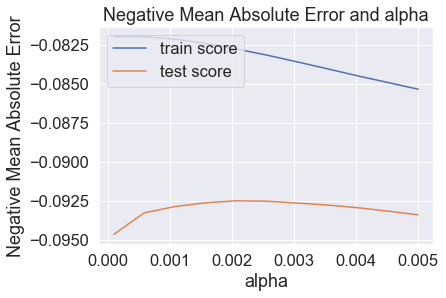

In [90]:
# plotting mean test and train scoes with alpha 
cv_results_lasso['param_alpha'] = cv_results_lasso['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_train_score'])
plt.plot(cv_results_lasso['param_alpha'], cv_results_lasso['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [91]:
alpha =.0025

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_scs, y_train) 

Lasso(alpha=0.0025, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [92]:
list(zip(X_train_scs.columns,lasso.coef_))

[('MSSubClass', -0.017432170356047383),
 ('MSZoning', -0.016957375000305305),
 ('LotArea', 0.020998012888112757),
 ('Street', -0.01207771506391443),
 ('Alley', 0.0),
 ('LotShape', -0.0022681356361386527),
 ('LandContour', 0.0007037576772467347),
 ('Utilities', -0.0004859091188252055),
 ('LotConfig', -0.0024220094501470565),
 ('LandSlope', -0.0037297268661040436),
 ('Neighborhood', 0.00031303032415058046),
 ('Condition1', 0.005465822900509076),
 ('Condition2', -0.017659008469106948),
 ('BldgType', 0.005946770533968909),
 ('HouseStyle', 0.0005197621836778249),
 ('OverallQual', 0.09983953182943785),
 ('OverallCond', 0.050287619632644456),
 ('YearBuilt', 0.043622688826198144),
 ('YearRemodAdd', 0.018475462388668828),
 ('RoofStyle', -0.0),
 ('RoofMatl', -0.001625695840463005),
 ('Exterior1st', -0.001500519439181292),
 ('Exterior2nd', -0.0),
 ('MasVnrType', -0.0),
 ('MasVnrArea', 0.0007853475784953915),
 ('ExterQual', 0.0038829542057459286),
 ('ExterCond', 0.003714542943176608),
 ('Foundatio

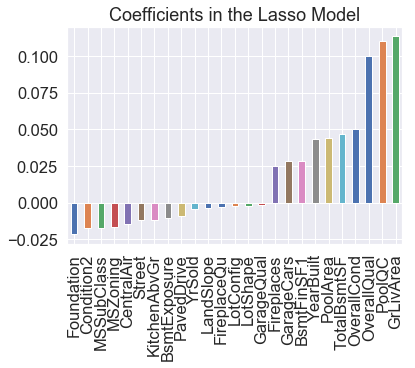

In [94]:
# Plot important coefficients

coefs = pd.Series(lasso.coef_, index = X_train_scs.columns)

imp_coefs = pd.concat([coefs.sort_values().head(15),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "bar")
plt.title("Coefficients in the Lasso Model")
plt.show()